In [1]:
# dataset: Social_Network_Ads.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0


In [4]:
# separate the data

x = df[['Age', 'EstimatedSalary']]

y = df['Purchased']

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

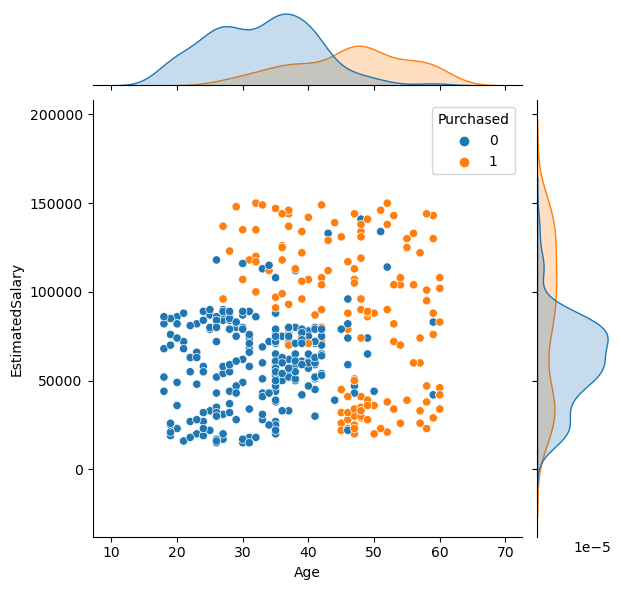

In [9]:
sns.jointplot(x = 'Age', y = 'EstimatedSalary',
             data = df, hue = 'Purchased');

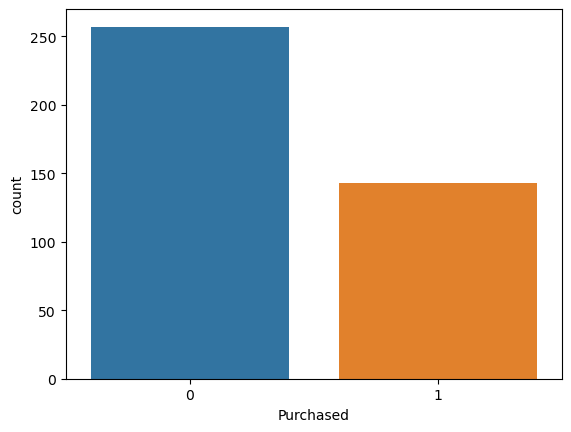

In [10]:
sns.countplot(x = y);

In [11]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

### cross validation

In [14]:
df.shape

(400, 5)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size= 0.25)

In [15]:
x_train.shape

(300, 2)

In [16]:
y_train.shape

(300,)

### Build the model

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt = DecisionTreeClassifier(random_state= 0)

In [19]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### Visualize the tree

In [20]:
from sklearn.tree import plot_tree

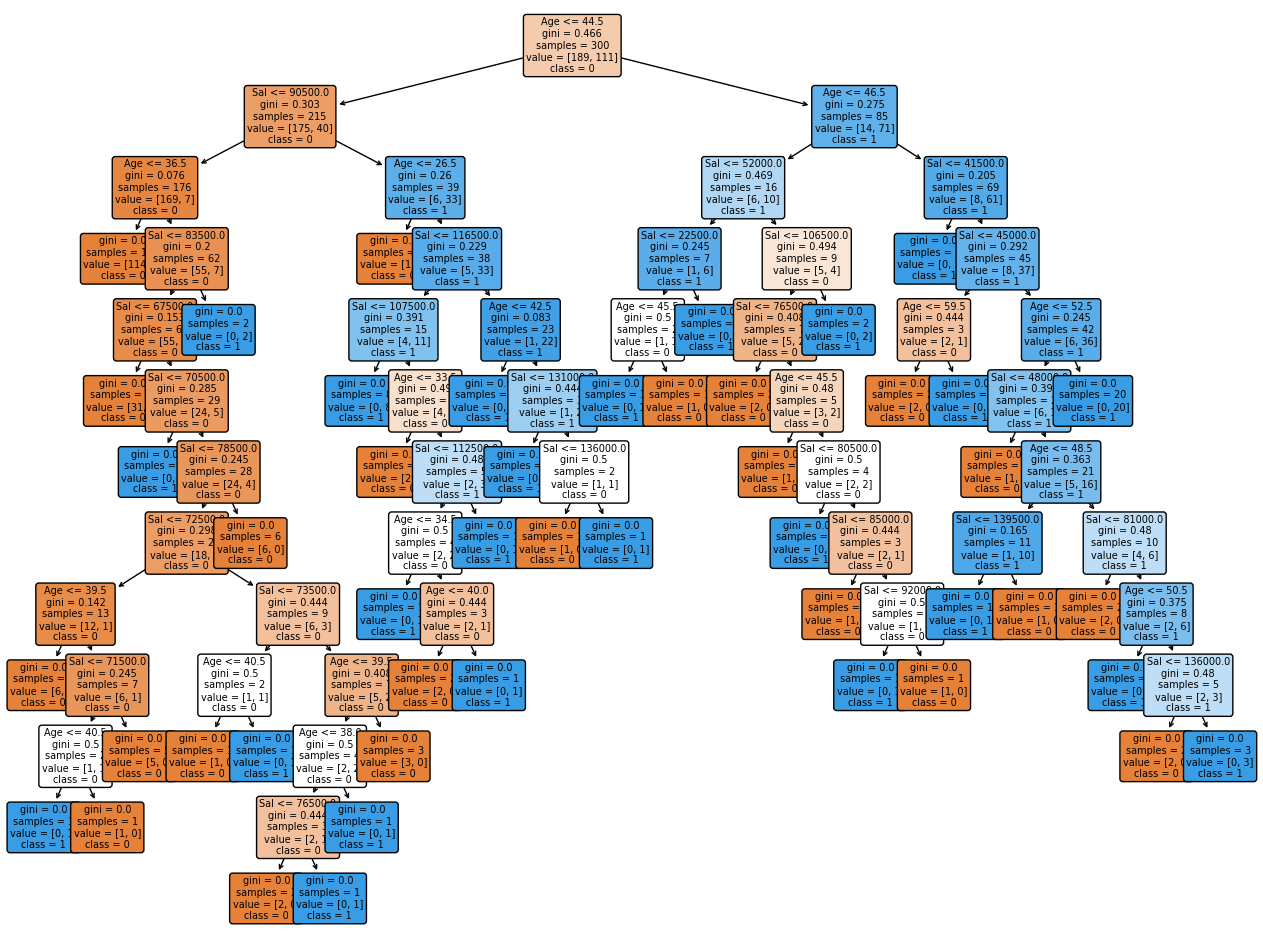

In [25]:
plt.figure(figsize=(16,12))

plot_tree(dt, rounded= True, feature_names= ['Age', 'Sal'],
         filled= True, class_names= ['0', '1'],
         fontsize= 7);

### Evaluate

In [26]:
y_pred = dt.predict(x_test)

In [27]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [29]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [30]:
# confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

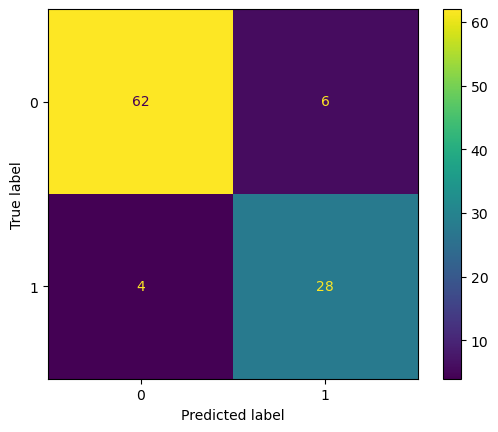

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [32]:
# classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.82      0.88      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



In [33]:
# accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9

#### predict on unseen data

In [34]:
new1 = [[30, 51000]]

In [35]:
dt.predict(new1)

array([0])